<a href="https://colab.research.google.com/github/fsemecurbe/MMTMSS/blob/main/MMTMSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Multifractals To Modelize Spatial Segregation

In [1]:
import pandas as pd
import numpy as np
rng = np.random.default_rng()
import matplotlib.pyplot as plt
import matplotlib as mpl
from skimage.measure import block_reduce

## Functions

In [2]:
def multivariate_lognormal_cascade(n, sigma1=1, sigma2=1, corr=0):
    mu1 = -1/2 * sigma1**2
    mu2 = -1/2 * sigma2**2

    PQ = np.exp(rng.multivariate_normal(np.array([mu1,mu2]),  np.array([[sigma1**2,corr*sigma1*sigma2], [corr*sigma1*sigma2, sigma2**2]]), 4))

    P = PQ[:,0].reshape(2,2)
    Q = PQ[:,1].reshape(2,2)
    for i in range(n):
        PQ = np.exp(rng.multivariate_normal(np.array([mu1,mu2]),np.array([[sigma1**2,corr*sigma1*sigma2], [corr*sigma1*sigma2, sigma2**2]]), P.shape[0]**2 * 4))
        P = np.kron(P, np.ones((2,2)))
        P = P * PQ[:,0].reshape(P.shape)
        Q = np.kron(Q, np.ones((2,2)))
        Q = Q * PQ[:,1].reshape(P.shape)

    P = P / np.sum(P)
    Q = Q / np.sum(Q)
    return(np.stack([P,Q], axis=-1))

#### Test de la fonction multivariate_lognormal_cascade

In [3]:
lnc = multivariate_lognormal_cascade(6, sigma1=.4, sigma2=.4, corr=.0)
ratio = .2 * lnc[:,:,0] / (.2 * lnc[:,:,0] + .8 * lnc[:,:,1]) * 100

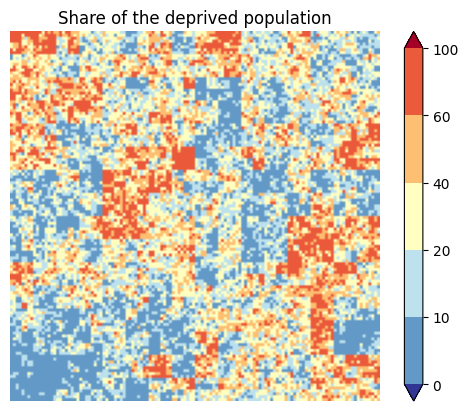

In [4]:
cmap = mpl.cm.RdYlBu_r
bounds = [0, 10, 20, 40, 60, 100]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots()
ax.set_axis_off();
ax.set_title('Share of the deprived population');
ax.imshow(cmap(norm(ratio)))
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax);

### Calcul d'entropie

In [7]:
lnc = multivariate_lognormal_cascade(8, sigma1=.5, sigma2=.4, corr=.0)
pop = lnc[:,:,0]
pop = block_reduce(pop, block_size = (4,4), func = np.sum)

3.339412578741234
2.843088770686956
2.318578019333173
1.7582977507389905


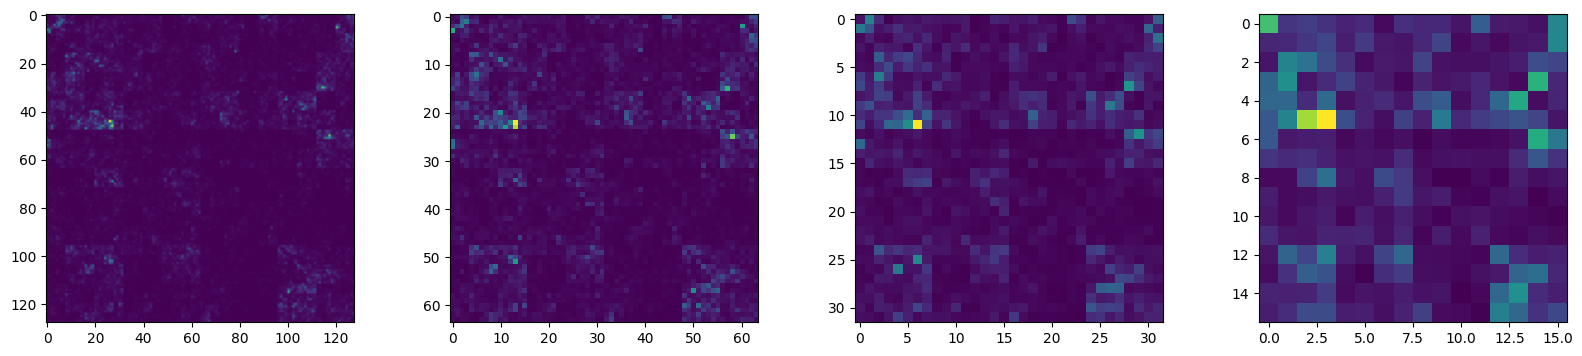

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
for i in range(4):
  small_arr = block_reduce(pop, block_size=(2**i,2**i), func=np.sum)
  axs[i].imshow(small_arr)
  print(np.var(np.log2(small_arr.flatten())))

(array([  2.,   0.,   5.,   2.,   7.,  14.,  22.,  28.,  42.,  60.,  83.,
        111., 176., 228., 288., 352., 431., 531., 636., 718., 743., 843.,
        962., 937., 971., 974., 949., 906., 908., 743., 683., 559., 497.,
        462., 382., 271., 238., 187., 153.,  75.,  76.,  39.,  36.,  17.,
         13.,  15.,   3.,   2.,   3.,   1.]),
 array([-22.02964911, -21.75516835, -21.48068758, -21.20620682,
        -20.93172606, -20.6572453 , -20.38276454, -20.10828378,
        -19.83380302, -19.55932226, -19.2848415 , -19.01036074,
        -18.73587998, -18.46139922, -18.18691846, -17.9124377 ,
        -17.63795694, -17.36347618, -17.08899542, -16.81451466,
        -16.5400339 , -16.26555314, -15.99107238, -15.71659162,
        -15.44211086, -15.1676301 , -14.89314934, -14.61866858,
        -14.34418782, -14.06970706, -13.79522629, -13.52074553,
        -13.24626477, -12.97178401, -12.69730325, -12.42282249,
        -12.14834173, -11.87386097, -11.59938021, -11.32489945,
        -11.050418

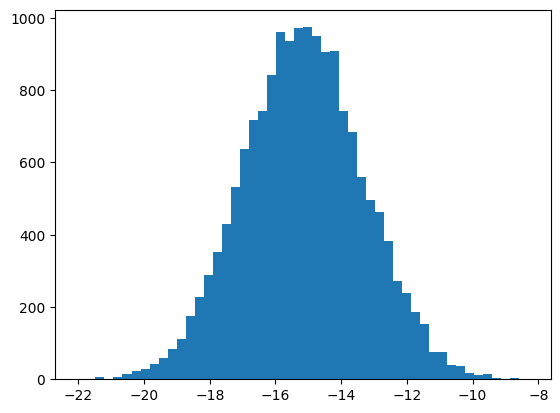

In [9]:
plt.hist(np.log2(pop.flatten('F')), bins=50)

In [24]:
res = []
for i in range(50):
  lnc = multivariate_lognormal_cascade(10, sigma1=.5, sigma2=.4, corr=.0)
  pop = block_reduce(lnc[:,:,0], block_size = (16,16), func = np.sum)
  entropies =  []
  scales = np.array([i for i in range(1,4)])
  for i in scales:
     small_arr = block_reduce(pop, block_size=(2**i,2**i), func=np.sum)
     entropies.append(-np.sum(small_arr * np.log2(small_arr)))
  entropies = np.array(entropies)
  res.append(-np.sum((entropies - entropies.mean()) * (scales - scales.mean())) / np.sum((scales - scales.mean())**2))
np.mean(res)

np.float64(1.8205188475175373)

In [23]:
sigma = .5
mu = -1/2 * sigma**2 - np.log(4)

res = []
for i in range(100000):
  samples = np.exp(np.random.normal(mu, sigma, size=4))
  #samples = samples / samples.sum()
  res.append(-np.sum(samples * np.log2(samples)))

print(np.mean(res))

1.8194178755602508


In [ ]:
res = []
for i in range(1000000):
  samples = np.exp(np.random.normal(mu, sigma, size=4))
  res.append(samples.sum())
np.mean(res)

np.float64(0.9999320967820047)

In [ ]:
np.sum((entropies - entropies.mean()) * (scales - scales.mean())) / np.sum((scales - scales.mean())**2)

np.float64(-1.4638276075246432)